## ViewCube survey analysis - Combined questions
67 participants (August, 5th 2024).

In [1]:
import pandas as pd
import numpy as np
import math
import csv

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle

In [2]:
import astropy
from astropy import stats

In [3]:
data = pd.read_csv("ViewCube_survey-2.csv", delimiter=';')
data.fillna("x-x", inplace=True)
data

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
1,0,x-x,x-x,x-x,RES_ENG,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
4,3,3.0,4/18/24 17:14:38,4/18/24 17:21:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Clasica,Prefiero no decirlo,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...
65,64,19.0,7/29/24 10:32:28,7/29/24 10:50:09,anonymous,Sonification 2,Left,Sonification 2,Sonification 3,Spectrum 2,...,No experienced,Some experienced (hobby/enthusiast),Pop music,21-30,No,Spain,Catalan,"Yes, I used headphones",Stereo;,x-x
66,65,3.0,4/15/24 9:17:06,4/15/24 9:51:59,anonymous,Sonification 1,Left,Sonification 3,Sonification 3,Spectrum 2,...,Very experienced (professional),Very basic experience,"Clasic, Rock",41-50,Yes,Spain,Spanish,"Yes, I used headphones",x-x,No queda claro si lo que distingue una regi´òn...
67,66,1.0,5/13/24 11:17:19,5/13/24 11:33:10,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Electronic,31-40,No,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [4]:
data_total_responses = len(data)-2
print("Total responses:", data_total_responses)

Total responses: 67


In [5]:
def percentage (participants):
    y = (participants/data_total_responses)*100
    return(y)

In [6]:
def percentage_sub (participants, subgroup_responses):
    z = (participants/subgroup_responses)*100
    return(z)

# Global results

In [7]:
check_1 = "Lejos"
check_2 = "derecha"
check_3 = "formación"
check_4 = "Far"
check_5 = "Right"
check_6 = "forming"

Q13G = len([i for i in range(len(data)) if ((check_1 in data.Q13[i]) and (check_2 in data.Q13[i]) and (check_3 in data.Q13[i])) or ((check_4 in data.Q13[i]) and (check_5 in data.Q13[i]) and (check_6 in data.Q13[i]))])-2

check_7 = "Cerca"
check_8 = "izquierda"
check_9 = "vieja"
check_10 = "Close"
check_11 = "Left"
check_12 = "Retired"

Q14G = len([i for i in range(len(data)) if ((check_7 in data.Q14[i]) and (check_8 in data.Q14[i]) and (check_9 in data.Q14[i])) or ((check_10 in data.Q14[i]) and (check_11 in data.Q14[i]) and (check_12 in data.Q14[i]))])-2

combined_correct = [Q13G,Q14G]
combined_correct = np.array(combined_correct, int)

combined_correct

array([11, 10])

In [8]:
mean_combined_correct = np.mean(combined_correct)
print("Global success mean (Combined questions):", mean_combined_correct/data_total_responses)
success_combined_correct = np.sum(combined_correct)
attempts_combined_correct = 2* data_total_responses
conf_combined_correct = astropy.stats.binom_conf_interval(success_combined_correct, attempts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_combined_correct) # Correct answers interval

Global success mean (Combined questions): 0.15671641791044777
Jeffreys confidence interval:  [0.1279104  0.19062512]


In [9]:
glob_comb = pd.Series(combined_correct/data_total_responses)
glob_comb.describe()

count    2.000000
mean     0.156716
std      0.010554
min      0.149254
25%      0.152985
50%      0.156716
75%      0.160448
max      0.164179
dtype: float64

### Percentage of success. Combined answers by question

In [10]:
Q13G_dist = len([i for i in range(len(data)) if ((check_1 in data.Q13[i]) or (check_4 in data.Q13[i]))])-2
Q13G_loc = len([i for i in range(len(data)) if ((check_2 in data.Q13[i]) or (check_5 in data.Q13[i]))])-2
Q13G_age = len([i for i in range(len(data)) if ((check_3 in data.Q13[i]) or (check_6 in data.Q13[i]))])-2

Q14G_dist = len([i for i in range(len(data)) if (check_7 in data.Q14[i]) or (check_10 in data.Q14[i])])-2
Q14G_loc = len([i for i in range(len(data)) if (check_8 in data.Q14[i]) or (check_11 in data.Q14[i])])-2
Q14G_age = len([i for i in range(len(data)) if (check_9 in data.Q14[i]) or (check_12 in data.Q14[i])])-2

print("Question 13 (Location, Distance, Type/Age): ", [Q13G_dist, Q13G_loc, Q13G_age])
Q13G_percent = [percentage(Q13G_loc), percentage(Q13G_dist), percentage(Q13G_age)]
print("%: ", Q13G_percent)

Q13G_percent = np.array(Q13G_percent, float)


print("Question 14 (Location, Distance, Type/Age): ", [Q14G_dist, Q14G_loc, Q14G_age])
Q14G_percent = [percentage(Q14G_loc), percentage(Q14G_dist), percentage(Q14G_age)]
print("%:", Q14G_percent)
Q14G_percent = np.array(Q14G_percent, float)

G_mean_combined = np.round((Q13G_percent + Q14G_percent)/2, 2)
     
print("G_Mean %: ", G_mean_combined)

Question 13 (Location, Distance, Type/Age):  [32, 50, 22]
%:  [74.6268656716418, 47.76119402985074, 32.83582089552239]
Question 14 (Location, Distance, Type/Age):  [30, 50, 27]
%: [74.6268656716418, 44.776119402985074, 40.298507462686565]
G_Mean %:  [74.63 46.27 36.57]


# Experts: Professional astronomers

In [11]:
experts_list = []
experts_index = []
experts_counter = 0
for i in range(len(data)):
    if (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])):
        experts_counter += 1
        current_row = data.iloc[i]
        experts_list.append(current_row)
        experts_index.append(i)
        
print("Number of Professional astronomers:", experts_counter)
experts_df = pd.DataFrame(experts_list)
experts_df

Number of Professional astronomers: 31


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
5,4,4.0,4/18/24 16:09:19,4/18/24 17:34:52,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Mucha experiencia (profesional),Muy básica,clásica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
16,15,15.0,4/23/24 12:44:04,4/23/24 13:08:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),"Clasica, Jazz, Cantautores",41-50,No,España,Italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
20,19,19.0,4/25/24 11:19:03,4/25/24 11:32:28,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Ninguna,Techno melódico,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,Todo mi apoyo para este proyecto tan necesario!
21,20,20.0,4/25/24 11:30:57,4/25/24 11:46:09,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Pop, rock, música española/latina y francesa, ...",21-30,No,España,Francés,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
22,21,21.0,4/25/24 14:36:30,4/25/24 15:03:00,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"jazz, clásica",41-50,No,españa,español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
29,28,28.0,4/29/24 11:22:35,4/29/24 11:31:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Música clásica, latino, pop-rock.",21-30,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;,x-x
32,31,31.0,5/2/24 18:31:56,5/2/24 18:51:31,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Jazz,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,La diferencia entre zona con formación estelar...
35,34,34.0,5/6/24 11:21:54,5/6/24 11:42:11,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica y pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,"Salvo la posición de los sonidos, las demás ca..."
37,36,36.0,5/24/24 1:59:41,5/24/24 4:34:47,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Clásica, Rock, Electrónica, un poco de todo",41-50,No,España,español,"Sí, utilicé auriculares.",Estéreo;,Un trabajo muy interesante. Enhorabuena


In [12]:
Q1E = len([i for i in range(len(experts_df)) if ((experts_df.Q1[experts_index[i]] == data.Q1[0]) or (experts_df.Q1[experts_index[i]] == data.Q1[1]))])
Q2E = len([i for i in range(len(experts_df)) if ((experts_df.Q2[experts_index[i]] == data.Q2[0]) or (experts_df.Q2[experts_index[i]] == data.Q2[1]))])
Q3E = len([i for i in range(len(experts_df)) if ((experts_df.Q3[experts_index[i]] == data.Q3[0]) or (experts_df.Q3[experts_index[i]] == data.Q3[1]))])
Q4E = len([i for i in range(len(experts_df)) if ((experts_df.Q4[experts_index[i]] == data.Q4[0]) or (experts_df.Q4[experts_index[i]] == data.Q4[1]))])
Q5E = len([i for i in range(len(experts_df)) if ((experts_df.Q5[experts_index[i]] == data.Q5[0]) or (experts_df.Q5[experts_index[i]] == data.Q5[1]))])
Q6E = len([i for i in range(len(experts_df)) if ((experts_df.Q6[experts_index[i]] == data.Q6[0]) or (experts_df.Q6[experts_index[i]] == data.Q6[1]))])
Q7E = len([i for i in range(len(experts_df)) if ((experts_df.Q7[experts_index[i]] == data.Q7[0]) or (experts_df.Q7[experts_index[i]] == data.Q7[1]))])
Q8E = len([i for i in range(len(experts_df)) if ((experts_df.Q8[experts_index[i]] == data.Q8[0]) or (experts_df.Q8[experts_index[i]] == data.Q8[1]))])
Q9E = len([i for i in range(len(experts_df)) if ((experts_df.Q9[experts_index[i]] == data.Q9[0]) or (experts_df.Q9[experts_index[i]] == data.Q9[1]))])
Q10E = len([i for i in range(len(experts_df)) if ((experts_df.Q10[experts_index[i]] == data.Q10[0]) or (experts_df.Q10[experts_index[i]] == data.Q10[1]))])
Q11E = len([i for i in range(len(experts_df)) if ((experts_df.Q11[experts_index[i]] == data.Q11[0]) or (experts_df.Q11[experts_index[i]] == data.Q11[1]))])
Q12E = len([i for i in range(len(experts_df)) if ((experts_df.Q12[experts_index[i]] == data.Q12[0]) or (experts_df.Q12[experts_index[i]] == data.Q12[1]))])

experts_correct = [Q1E,Q2E,Q3E,Q4E,Q5E,Q6E,Q7E,Q8E,Q9E,Q10E,Q11E,Q12E]
experts_correct = np.array(experts_correct, int)
experts_correct #12 Single response correct results

array([16, 28, 11, 14, 22, 21, 17, 24, 17,  7, 13, 16])

In [13]:
experts_total_responses = len(experts_df)
mean_experts_correct = np.mean(experts_correct)
print("Total responses: ", experts_total_responses)
print("Professional astronomers success mean:", mean_experts_correct/experts_total_responses)

success_experts_correct = np.sum(experts_correct)
attempts_experts_correct = 12* experts_total_responses
conf_experts_correct = astropy.stats.binom_conf_interval(success_experts_correct, attempts_experts_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_correct) # Correct answers interval

Total responses:  31
Professional astronomers success mean: 0.5537634408602151
Jeffreys confidence interval:  [0.52787996 0.57935834]


In [14]:
experts = pd.Series(experts_correct/experts_total_responses)
experts.describe()

count    12.000000
mean      0.553763
std       0.188011
min       0.225806
25%       0.443548
50%       0.532258
75%       0.685484
max       0.903226
dtype: float64

In [15]:
Q13E = len([i for i in range(len(experts_df)) if ((check_1 in experts_df.Q13[experts_index[i]]) and (check_2 in experts_df.Q13[experts_index[i]]) and (check_3 in experts_df.Q13[experts_index[i]])) or ((check_4 in experts_df.Q13[experts_index[i]]) and (check_5 in experts_df.Q13[experts_index[i]]) and (check_6 in experts_df.Q13[experts_index[i]]))])
Q14E = len([i for i in range(len(experts_df)) if ((check_7 in experts_df.Q14[experts_index[i]]) and (check_8 in experts_df.Q14[experts_index[i]]) and (check_9 in experts_df.Q14[experts_index[i]])) or ((check_10 in experts_df.Q14[experts_index[i]]) and (check_11 in experts_df.Q14[experts_index[i]]) and (check_12 in experts_df.Q14[experts_index[i]]))])

experts_combined_correct = [Q13E,Q14E]
experts_combined_correct = np.array(experts_combined_correct, int)

experts_combined_correct

array([7, 2])

In [16]:
mean_experts_combined_correct = np.mean(experts_combined_correct)
print("Professional astronomers success mean (Combined questions):", mean_experts_combined_correct/experts_total_responses)
success_experts_combined_correct = np.sum(experts_combined_correct)
attempts_experts_combined_correct = 2* experts_total_responses
conf_experts_combined_correct = astropy.stats.binom_conf_interval(success_experts_combined_correct, attempts_experts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_experts_combined_correct) # Correct answers interval

Professional astronomers success mean (Combined questions): 0.14516129032258066
Jeffreys confidence interval:  [0.10621113 0.19545766]


In [17]:
experts_combined = pd.Series(experts_combined_correct/experts_total_responses)
experts_combined.describe()

count    2.000000
mean     0.145161
std      0.114049
min      0.064516
25%      0.104839
50%      0.145161
75%      0.185484
max      0.225806
dtype: float64

### Percentage of success. Combined answers by question

In [18]:
Q13E_dist = len([i for i in range(len(experts_df)) if ((check_1 in experts_df.Q13[experts_index[i]]) or (check_4 in experts_df.Q13[experts_index[i]]))])
Q13E_loc = len([i for i in range(len(experts_df)) if ((check_2 in experts_df.Q13[experts_index[i]]) or (check_5 in experts_df.Q13[experts_index[i]]))])
Q13E_age = len([i for i in range(len(experts_df)) if ((check_3 in experts_df.Q13[experts_index[i]]) or (check_6 in experts_df.Q13[experts_index[i]]))])

Q14E_dist = len([i for i in range(len(experts_df)) if (check_7 in experts_df.Q14[experts_index[i]]) or (check_10 in experts_df.Q14[experts_index[i]])])
Q14E_loc = len([i for i in range(len(experts_df)) if (check_8 in experts_df.Q14[experts_index[i]]) or (check_11 in experts_df.Q14[experts_index[i]])])
Q14E_age = len([i for i in range(len(experts_df)) if (check_9 in experts_df.Q14[experts_index[i]]) or (check_12 in experts_df.Q14[experts_index[i]])])

print("Question 13 (Location, Distance, Type/Age): ", [Q13E_loc, Q13E_dist, Q13E_age])
Q13E_percent = [percentage_sub(Q13E_loc, experts_total_responses), percentage_sub(Q13E_dist, experts_total_responses), percentage_sub(Q13E_age, experts_total_responses)]
print("%: ", Q13E_percent)

Q13E_percent = np.array(Q13E_percent, float)


print("Question 14 (Location, Distance, Type/Age): ", [Q14E_loc, Q14E_dist, Q14E_age])
Q14E_percent = [percentage_sub(Q14E_loc, experts_total_responses), percentage_sub(Q14E_dist, experts_total_responses), percentage_sub(Q14E_age, experts_total_responses)]
print("%:", Q14E_percent)
Q14E_percent = np.array(Q14E_percent, float)

E_mean_combined = np.round((Q13E_percent + Q14E_percent)/2, 2)
     
print("E_Mean %: ", E_mean_combined)

Question 13 (Location, Distance, Type/Age):  [24, 16, 11]
%:  [77.41935483870968, 51.61290322580645, 35.483870967741936]
Question 14 (Location, Distance, Type/Age):  [24, 9, 12]
%: [77.41935483870968, 29.03225806451613, 38.70967741935484]
E_Mean %:  [77.42 40.32 37.1 ]


# Non experts. Non-professional astronomers

In [19]:
nonExperts_list = []
nonExperts_index = []
nonExperts_counter = 0
for i in range(2,len(data)):
    if not (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])):
        nonExperts_counter += 1
        current_row = data.iloc[i]
        nonExperts_list.append(current_row)
        nonExperts_index.append(i)
        
print("Number of Non-professional astronomers:", nonExperts_counter)
nonExperts_df = pd.DataFrame(nonExperts_list)
nonExperts_df

Number of Non-professional astronomers: 36


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
4,3,3.0,4/18/24 17:14:38,4/18/24 17:21:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Clasica,Prefiero no decirlo,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
6,5,5.0,4/18/24 21:15:36,4/18/24 21:19:42,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,Música del mundo,Más de 60,No,Canada,español,"Sí, utilicé auriculares.",Estéreo;,muy interesante
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
8,7,7.0,4/18/24 21:09:34,4/18/24 21:41:59,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Clasica,Más de 60,No,España,Española,"Sí, utilicé auriculares.",No lo sé.;Estéreo;,x-x
9,8,8.0,4/18/24 21:31:33,4/18/24 21:43:57,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Ninguna,Clásica,51-60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
12,11,11.0,4/19/24 10:07:08,4/19/24 10:14:43,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Boleros,Más de 60,No,España,Español,"Sí, utilicé auriculares.",No lo sé.;,x-x
13,12,12.0,4/20/24 12:25:14,4/20/24 12:34:51,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,clasica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x


### Random downsampling

In [20]:
nonExperts_down = nonExperts_df.sample(frac=0.85, replace=False, random_state=1)
nonExperts_down

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
57,56,11.0,6/26/24 6:39:03,6/26/24 7:09:03,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Some experienced (hobby/enthusiast),Some experienced (hobby/enthusiast),Alternative rock & Japanese pop,31-40,No,Japan,Chinese,"Yes, I used headphones",I don't know;,I am not sure the use of this tool. It is not...
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...
52,51,6.0,5/27/24 2:29:28,5/27/24 2:57:48,anonymous,Sonification 2,Left,Sonification 3,Sonification 2,Spectrum 1,...,No experienced,Not experienced,Jazz and Pops,41-50,No,Japan,Japanese,"Yes, I used headphones",Stereo;,The age of the stellar was rather difficult fo...
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
27,26,26.0,4/26/24 19:53:36,4/27/24 0:52:27,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Muy básica,Jazz,41-50,No,España,Mallorquín,"Sí, utilicé auriculares.",Estéreo;,x-x
25,24,24.0,4/26/24 19:24:11,4/26/24 19:40:14,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Ninguna,Electrónica,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x
30,29,29.0,4/30/24 11:11:36,4/30/24 11:37:53,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Mucha experiencia (professional),"Rock psicodelico, Jazz, Reggae, Electronica",31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Intra-aurales;,x-x
33,32,32.0,5/3/24 12:31:43,5/3/24 13:15:07,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Experimental,31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
54,53,8.0,6/23/24 15:32:58,6/23/24 16:18:51,anonymous,Sonification 1,Left,Sonification 2,Sonification 1,Spectrum 3,...,Some experienced (hobby/enthusiast),Very basic experience,popular songs,21-30,No,中国,中文,"Yes, I used headphones",Stereo;,x-x
38,37,37.0,5/25/24 11:00:56,5/25/24 11:10:50,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Algo de experiencia (hobby/entusiasta),Mucha experiencia (professional),Todo tipo de música,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x


In [21]:
len(nonExperts_down)

31

In [22]:
nonExperts_index2 = []
for i in range(len(nonExperts_down)):
    nonExperts_index2.append(nonExperts_down.index[i])
nonExperts_index2

[57,
 64,
 52,
 7,
 27,
 25,
 30,
 33,
 54,
 38,
 47,
 63,
 34,
 36,
 8,
 6,
 19,
 14,
 61,
 31,
 60,
 28,
 26,
 10,
 18,
 11,
 65,
 4,
 24,
 3,
 23]

In [23]:
Q1nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q1[nonExperts_index2[i]] == data.Q1[0]) or (nonExperts_df.Q1[nonExperts_index2[i]] == data.Q1[1]))])
Q2nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q2[nonExperts_index2[i]] == data.Q2[0]) or (nonExperts_df.Q2[nonExperts_index2[i]] == data.Q2[1]))])
Q3nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q3[nonExperts_index2[i]] == data.Q3[0]) or (nonExperts_df.Q3[nonExperts_index2[i]] == data.Q3[1]))])
Q4nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q4[nonExperts_index2[i]] == data.Q4[0]) or (nonExperts_df.Q4[nonExperts_index2[i]] == data.Q4[1]))])
Q5nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q5[nonExperts_index2[i]] == data.Q5[0]) or (nonExperts_df.Q5[nonExperts_index2[i]] == data.Q5[1]))])
Q6nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q6[nonExperts_index2[i]] == data.Q6[0]) or (nonExperts_df.Q6[nonExperts_index2[i]] == data.Q6[1]))])
Q7nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q7[nonExperts_index2[i]] == data.Q7[0]) or (nonExperts_df.Q7[nonExperts_index2[i]] == data.Q7[1]))])
Q8nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q8[nonExperts_index2[i]] == data.Q8[0]) or (nonExperts_df.Q8[nonExperts_index2[i]] == data.Q8[1]))])
Q9nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q9[nonExperts_index2[i]] == data.Q9[0]) or (nonExperts_df.Q9[nonExperts_index2[i]] == data.Q9[1]))])
Q10nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q10[nonExperts_index2[i]] == data.Q10[0]) or (nonExperts_df.Q10[nonExperts_index2[i]] == data.Q10[1]))])
Q11nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q11[nonExperts_index2[i]] == data.Q11[0]) or (nonExperts_df.Q11[nonExperts_index2[i]] == data.Q11[1]))])
Q12nE = len([i for i in range(len(nonExperts_down)) if ((nonExperts_df.Q12[nonExperts_index2[i]] == data.Q12[0]) or (nonExperts_df.Q12[nonExperts_index2[i]] == data.Q12[1]))])

nonExperts_correct = [Q1nE,Q2nE,Q3nE,Q4nE,Q5nE,Q6nE,Q7nE,Q8nE,Q9nE,Q10nE,Q11nE,Q12nE]
nonExperts_correct = np.array(nonExperts_correct, int)
nonExperts_correct #12 Single response correct results

array([12, 26, 11,  9, 17, 21, 16, 19, 14,  7, 13, 14])

In [24]:
nonExperts_total_responses = len(nonExperts_down)
mean_nonExperts_correct = np.mean(nonExperts_correct)
print("Total responses: ", nonExperts_total_responses)
print("Non-professional astronomers success mean:", mean_nonExperts_correct/nonExperts_total_responses)

success_nonExperts_correct = np.sum(nonExperts_correct)
attempts_nonExperts_correct = 12* nonExperts_total_responses
conf_nonExperts_correct = astropy.stats.binom_conf_interval(success_nonExperts_correct, attempts_nonExperts_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nonExperts_correct) # Correct answers interval

Total responses:  31
Non-professional astronomers success mean: 0.4811827956989247
Jeffreys confidence interval:  [0.45536258 0.50710401]


In [25]:
nonExperts = pd.Series(nonExperts_correct/nonExperts_total_responses)
nonExperts.describe()

count    12.000000
mean      0.481183
std       0.170947
min       0.225806
25%       0.379032
50%       0.451613
75%       0.564516
max       0.838710
dtype: float64

In [26]:
Q13nE = len([i for i in range(len(nonExperts_down)) if ((check_1 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_2 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_3 in nonExperts_down.Q13[nonExperts_index2[i]])) or ((check_4 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_5 in nonExperts_down.Q13[nonExperts_index2[i]]) and (check_6 in nonExperts_down.Q13[nonExperts_index2[i]]))])

Q14nE = len([i for i in range(len(nonExperts_down)) if ((check_7 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_8 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_9 in nonExperts_down.Q14[nonExperts_index2[i]])) or ((check_10 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_11 in nonExperts_down.Q14[nonExperts_index2[i]]) and (check_12 in nonExperts_down.Q14[nonExperts_index2[i]]))])

nonExperts_combined_correct = [Q13nE,Q14nE]
nonExperts_combined_correct = np.array(nonExperts_combined_correct, int)

nonExperts_combined_correct

array([4, 8])

In [27]:
mean_nonExperts_combined_correct = np.mean(nonExperts_combined_correct)
print("Non-professional astronomers success mean (Combined questions):", mean_nonExperts_combined_correct/nonExperts_total_responses)
success_nonExperts_combined_correct = np.sum(nonExperts_combined_correct)
attempts_nonExperts_combined_correct = 2* nonExperts_total_responses
conf_nonExperts_combined_correct = astropy.stats.binom_conf_interval(success_nonExperts_combined_correct, attempts_nonExperts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nonExperts_combined_correct) # Correct answers interval

Non-professional astronomers success mean (Combined questions): 0.1935483870967742
Jeffreys confidence interval:  [0.14851068 0.24838159]


In [28]:
nonExperts_combined = pd.Series(nonExperts_combined_correct/nonExperts_total_responses)
nonExperts_combined.describe()

count    2.000000
mean     0.193548
std      0.091240
min      0.129032
25%      0.161290
50%      0.193548
75%      0.225806
max      0.258065
dtype: float64

### Percentage of success. Combined answers by question

In [29]:
Q13nE_dist = len([i for i in range(len(nonExperts_down)) if ((check_1 in nonExperts_down.Q13[nonExperts_index2[i]]) or (check_4 in nonExperts_down.Q13[nonExperts_index2[i]]))])
Q13nE_loc = len([i for i in range(len(nonExperts_down)) if ((check_2 in nonExperts_down.Q13[nonExperts_index2[i]]) or (check_5 in nonExperts_down.Q13[nonExperts_index2[i]]))])
Q13nE_age = len([i for i in range(len(nonExperts_down)) if ((check_3 in nonExperts_down.Q13[nonExperts_index2[i]]) or (check_6 in nonExperts_down.Q13[nonExperts_index2[i]]))])

Q14nE_dist = len([i for i in range(len(nonExperts_down)) if (check_7 in nonExperts_down.Q14[nonExperts_index2[i]]) or (check_10 in nonExperts_down.Q14[nonExperts_index2[i]])])
Q14nE_loc = len([i for i in range(len(nonExperts_down)) if (check_8 in nonExperts_down.Q14[nonExperts_index2[i]]) or (check_11 in nonExperts_down.Q14[nonExperts_index2[i]])])
Q14nE_age = len([i for i in range(len(nonExperts_down)) if (check_9 in nonExperts_down.Q14[nonExperts_index2[i]]) or (check_12 in nonExperts_down.Q14[nonExperts_index2[i]])])

print("Question 13 (Location, Distance, Type/Age): ", [Q13nE_loc, Q13nE_dist, Q13nE_age])
Q13nE_percent = [percentage_sub(Q13nE_loc, nonExperts_total_responses), percentage_sub(Q13nE_dist, nonExperts_total_responses), percentage_sub(Q13nE_age, nonExperts_total_responses)]
print("%: ", Q13nE_percent)

Q13nE_percent = np.array(Q13nE_percent, float)


print("Question 14 (Location, Distance, Type/Age): ", [Q14nE_loc, Q14nE_dist, Q14nE_age])
Q14nE_percent = [percentage_sub(Q14nE_loc, nonExperts_total_responses), percentage_sub(Q14nE_dist,nonExperts_total_responses), percentage_sub(Q14nE_age, nonExperts_total_responses)]
print("%:", Q14nE_percent)
Q14nE_percent = np.array(Q14nE_percent, float)

nE_mean_combined = np.round((Q13nE_percent + Q14nE_percent)/2, 2)
     
print("nE_Mean %: ", nE_mean_combined)

Question 13 (Location, Distance, Type/Age):  [23, 14, 11]
%:  [74.19354838709677, 45.16129032258064, 35.483870967741936]
Question 14 (Location, Distance, Type/Age):  [22, 17, 15]
%: [70.96774193548387, 54.83870967741935, 48.38709677419355]
nE_Mean %:  [72.58 50.   41.94]


## SUBGROUPS. Professional astronomers - professional & amateur musicians

In [30]:
astromus_list = []
astromus_index = []
astromus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]))):
        astromus_counter += 1
        current_row = data.iloc[i]
        astromus_list.append(current_row)
        astromus_index.append(i)
        
print("Number of Professional astronomers - professional & amateur musicians:", astromus_counter)
astromus_df = pd.DataFrame(astromus_list)
astromus_df

Number of Professional astronomers - professional & amateur musicians: 11


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
16,15,15.0,4/23/24 12:44:04,4/23/24 13:08:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),"Clasica, Jazz, Cantautores",41-50,No,España,Italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
32,31,31.0,5/2/24 18:31:56,5/2/24 18:51:31,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Jazz,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,La diferencia entre zona con formación estelar...
35,34,34.0,5/6/24 11:21:54,5/6/24 11:42:11,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica y pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,"Salvo la posición de los sonidos, las demás ca..."
39,38,38.0,5/26/24 21:53:07,5/26/24 22:10:15,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Rock,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
46,45,5.0,4/27/24 10:16:07,4/27/24 10:37:46,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;Estéreo;,x-x
49,48,3.0,4/26/24 4:40:27,4/26/24 5:03:39,anonymous,Sonification 1,Right,Sonification 2,Sonification 1,Spectrum 2,...,Very experienced (professional),Experienced (amateur),"Rock, folk, jazz",31-40,No,Spain,Greek,"Yes, I used headphones",Intra-aural;,The localization was not very easy to distinct...
50,49,4.0,5/2/24 17:18:28,5/2/24 17:35:06,anonymous,Sonification 1,Left,Sonification 2,Sonification 4,Spectrum 2,...,Very experienced (professional),Experienced (amateur),"classical, indie",41-50,No,Canada,Swedish,"Yes, I used headphones",Intra-aural;I don't know;,"It was fairly easy in the beginning, but I had..."
53,52,7.0,6/1/24 10:16:23,6/1/24 10:29:00,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Classical but also rock,41-50,No,Germany,Spanish,"Yes, I used headphones",Stereo;,x-x
62,61,16.0,7/18/24 16:24:37,7/18/24 16:39:13,anonymous,Sonification 1,Left,Sonification 3,Sonification 2,Spectrum 3,...,Very experienced (professional),Very experienced (professional),"Electronic Music, Jazz, Classical, Folk, Rock",41-50,No,Malta,English,"Yes, I used headphones",Stereo;,x-x
67,66,1.0,5/13/24 11:17:19,5/13/24 11:33:10,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Electronic,31-40,No,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [31]:
astromus_df.Q1[astromus_index[0]]

'Sonificación 1'

In [32]:
Q1AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q1[astromus_index[i]] == data.Q1[0]) or (astromus_df.Q1[astromus_index[i]] == data.Q1[1]))])
Q2AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q2[astromus_index[i]] == data.Q2[0]) or (astromus_df.Q2[astromus_index[i]] == data.Q2[1]))])
Q3AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q3[astromus_index[i]] == data.Q3[0]) or (astromus_df.Q3[astromus_index[i]] == data.Q3[1]))])
Q4AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q4[astromus_index[i]] == data.Q4[0]) or (astromus_df.Q4[astromus_index[i]] == data.Q4[1]))])
Q5AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q5[astromus_index[i]] == data.Q5[0]) or (astromus_df.Q5[astromus_index[i]] == data.Q5[1]))])
Q6AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q6[astromus_index[i]] == data.Q6[0]) or (astromus_df.Q6[astromus_index[i]] == data.Q6[1]))])
Q7AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q7[astromus_index[i]] == data.Q7[0]) or (astromus_df.Q7[astromus_index[i]] == data.Q7[1]))])
Q8AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q8[astromus_index[i]] == data.Q8[0]) or (astromus_df.Q8[astromus_index[i]] == data.Q8[1]))])
Q9AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q9[astromus_index[i]] == data.Q9[0]) or (astromus_df.Q9[astromus_index[i]] == data.Q9[1]))])
Q10AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q10[astromus_index[i]] == data.Q10[0]) or (astromus_df.Q10[astromus_index[i]] == data.Q10[1]))])
Q11AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q11[astromus_index[i]] == data.Q11[0]) or (astromus_df.Q11[astromus_index[i]] == data.Q11[1]))])
Q12AM = len([i for i in range(len(astromus_df)) if ((astromus_df.Q12[astromus_index[i]] == data.Q12[0]) or (astromus_df.Q12[astromus_index[i]] == data.Q12[1]))])

astromus_correct = [Q1AM,Q2AM,Q3AM,Q4AM,Q5AM,Q6AM,Q7AM,Q8AM,Q9AM,Q10AM,Q11AM,Q12AM]
astromus_correct = np.array(astromus_correct, int)
astromus_correct #12 Single response correct results

array([7, 8, 2, 5, 8, 8, 8, 9, 6, 1, 5, 5])

In [33]:
astromus_total_responses = len(astromus_df)
mean_astromus_correct = np.mean(astromus_correct)
print("Total responses: ", astromus_total_responses)
print("Professional astronomers - amateur musicians success mean:", mean_astromus_correct/astromus_total_responses)

success_astromus_correct = np.sum(astromus_correct)
attempts_astromus_correct = 12* astromus_total_responses
conf_astromus_correct = astropy.stats.binom_conf_interval(success_astromus_correct, attempts_astromus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astromus_correct) # Correct answers interval

Total responses:  11
Professional astronomers - amateur musicians success mean: 0.5454545454545454
Jeffreys confidence interval:  [0.50193513 0.58828837]


astromus = pd.Series(astromus_correct/astromus_total_responses)
astromus.describe()

In [34]:
Q13AM = len([i for i in range(len(astromus_df)) if ((check_1 in astromus_df.Q13[astromus_index[i]]) and (check_2 in astromus_df.Q13[astromus_index[i]]) and (check_3 in astromus_df.Q13[astromus_index[i]])) or ((check_4 in astromus_df.Q13[astromus_index[i]]) and (check_5 in astromus_df.Q13[astromus_index[i]]) and (check_6 in astromus_df.Q13[astromus_index[i]]))])

Q14AM = len([i for i in range(len(astromus_df)) if ((check_7 in astromus_df.Q14[astromus_index[i]]) and (check_8 in astromus_df.Q14[astromus_index[i]]) and (check_9 in astromus_df.Q14[astromus_index[i]])) or ((check_10 in astromus_df.Q14[astromus_index[i]]) and (check_11 in astromus_df.Q14[astromus_index[i]]) and (check_12 in astromus_df.Q14[astromus_index[i]]))])

astromus_combined_correct = [Q13AM,Q14AM]
astromus_combined_correct = np.array(astromus_combined_correct, int)

astromus_combined_correct

array([2, 1])

In [35]:
mean_astromus_combined_correct = np.mean(astromus_combined_correct)
print("Professional astronomers - professional & amateur musicians success mean (Combined questions):", mean_astromus_combined_correct/astromus_total_responses)
success_astromus_combined_correct = np.sum(astromus_combined_correct)
attempts_astromus_combined_correct = 2* astromus_total_responses
conf_astromus_combined_correct = astropy.stats.binom_conf_interval(success_astromus_combined_correct, attempts_astromus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astromus_combined_correct) # Correct answers interval

Professional astronomers - professional & amateur musicians success mean (Combined questions): 0.13636363636363635
Jeffreys confidence interval:  [0.07970543 0.22526205]


In [36]:
astromus_combined = pd.Series(astromus_combined_correct/astromus_total_responses)
astromus_combined.describe()

count    2.000000
mean     0.136364
std      0.064282
min      0.090909
25%      0.113636
50%      0.136364
75%      0.159091
max      0.181818
dtype: float64

### Percentage of success. Combined answers by question

In [37]:
Q13AM_dist = len([i for i in range(len(astromus_df)) if ((check_1 in astromus_df.Q13[astromus_index[i]]) or (check_4 in astromus_df.Q13[astromus_index[i]]))])
Q13AM_loc = len([i for i in range(len(astromus_df)) if ((check_2 in astromus_df.Q13[astromus_index[i]]) or (check_5 in astromus_df.Q13[astromus_index[i]]))])
Q13AM_age = len([i for i in range(len(astromus_df)) if ((check_3 in astromus_df.Q13[astromus_index[i]]) or (check_6 in astromus_df.Q13[astromus_index[i]]))])

Q14AM_dist = len([i for i in range(len(astromus_df)) if (check_7 in astromus_df.Q14[astromus_index[i]]) or (check_10 in astromus_df.Q14[astromus_index[i]])])
Q14AM_loc = len([i for i in range(len(astromus_df)) if (check_8 in astromus_df.Q14[astromus_index[i]]) or (check_11 in astromus_df.Q14[astromus_index[i]])])
Q14AM_age = len([i for i in range(len(astromus_df)) if (check_9 in astromus_df.Q14[astromus_index[i]]) or (check_12 in astromus_df.Q14[astromus_index[i]])])

print("Question 13 (Location, Distance, Type/Age): ", [Q13AM_loc, Q13AM_dist, Q13AM_age])
Q13AM_percent = [percentage_sub(Q13AM_loc, astromus_total_responses), percentage_sub(Q13AM_dist, astromus_total_responses), percentage_sub(Q13AM_age,astromus_total_responses)]
print("%: ", Q13AM_percent)

Q13AM_percent = np.array(Q13AM_percent, float)


print("Question 14 (Location, Distance, Type/Age): ", [Q14AM_loc, Q14AM_dist, Q14AM_age])
Q14AM_percent = [percentage_sub(Q14AM_loc, astromus_total_responses), percentage_sub(Q14AM_dist, astromus_total_responses), percentage_sub(Q14AM_age,astromus_total_responses)]
print("%:", Q14AM_percent)
Q14AM_percent = np.array(Q14AM_percent, float)

AM_mean_combined = np.round((Q13AM_percent + Q14AM_percent)/2, 2)
     
print("AM_Mean %: ", AM_mean_combined)

Question 13 (Location, Distance, Type/Age):  [8, 5, 3]
%:  [72.72727272727273, 45.45454545454545, 27.27272727272727]
Question 14 (Location, Distance, Type/Age):  [8, 3, 3]
%: [72.72727272727273, 27.27272727272727, 27.27272727272727]
AM_Mean %:  [72.73 36.36 27.27]


## SUBGROUPS. Astronomers non-musicians

In [38]:
astro_nonmus_list = []
astro_nonmus_index = []
astro_nonmus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and not (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i]))):
        astro_nonmus_counter += 1
        current_row = data.iloc[i]
        astro_nonmus_list.append(current_row)
        astro_nonmus_index.append(i)
        
print("Number of Professional astronomers non-musicians:", astro_nonmus_counter)
astro_nonmus_df = pd.DataFrame(astro_nonmus_list)
astro_nonmus_df

Number of Professional astronomers non-musicians: 13


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
5,4,4.0,4/18/24 16:09:19,4/18/24 17:34:52,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Mucha experiencia (profesional),Muy básica,clásica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
20,19,19.0,4/25/24 11:19:03,4/25/24 11:32:28,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Ninguna,Techno melódico,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,Todo mi apoyo para este proyecto tan necesario!
21,20,20.0,4/25/24 11:30:57,4/25/24 11:46:09,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Pop, rock, música española/latina y francesa, ...",21-30,No,España,Francés,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
40,39,39.0,6/14/24 12:39:07,6/14/24 19:32:03,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Mucha experiencia (profesional),Muy básica,Rock,41-50,No,España,italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
42,41,1.0,4/25/24 9:19:19,4/25/24 9:23:16,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 3,...,Mucha experiencia (profesional),Muy básica,Toda,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
44,43,3.0,4/25/24 11:55:21,4/25/24 12:18:21,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Rock suave, reggae, hip-hop, flamenco",21-30,No,España,"Euskara, Castellano","Sí, utilicé auriculares.",Audio 3D / Gaming;,Me hubiese ayudado una explicación más detalla...
45,44,4.0,4/26/24 23:27:16,4/27/24 0:15:56,anonymous,Sonificación 2,A la izquierda,Sonificación 1,Sonificación 4,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Rock,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
48,47,2.0,4/17/24 11:32:00,4/17/24 12:09:06,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 1,...,Very experienced (professional),Not experienced,"Rock, trash, grunge, metal",31-40,No,Spain,Spanish,"Yes, I used headphones",x-x,x-x
55,54,9.0,6/24/24 16:27:17,6/24/24 16:46:13,anonymous,Sonification 2,Left,Sonification 4,Sonification 2,Spectrum 2,...,Very experienced (professional),Very basic experience,rock,21-30,No,China,Chinese,"No, I didn't",I don't know;,x-x


In [39]:
Q1ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q1[astro_nonmus_index[i]] == data.Q1[0]) or (astro_nonmus_df.Q1[astro_nonmus_index[i]] == data.Q1[1]))])
Q2ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q2[astro_nonmus_index[i]] == data.Q2[0]) or (astro_nonmus_df.Q2[astro_nonmus_index[i]] == data.Q2[1]))])
Q3ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q3[astro_nonmus_index[i]] == data.Q3[0]) or (astro_nonmus_df.Q3[astro_nonmus_index[i]] == data.Q3[1]))])
Q4ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q4[astro_nonmus_index[i]] == data.Q4[0]) or (astro_nonmus_df.Q4[astro_nonmus_index[i]] == data.Q4[1]))])
Q5ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q5[astro_nonmus_index[i]] == data.Q5[0]) or (astro_nonmus_df.Q5[astro_nonmus_index[i]] == data.Q5[1]))])
Q6ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q6[astro_nonmus_index[i]] == data.Q6[0]) or (astro_nonmus_df.Q6[astro_nonmus_index[i]] == data.Q6[1]))])
Q7ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q7[astro_nonmus_index[i]] == data.Q7[0]) or (astro_nonmus_df.Q7[astro_nonmus_index[i]] == data.Q7[1]))])
Q8ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q8[astro_nonmus_index[i]] == data.Q8[0]) or (astro_nonmus_df.Q8[astro_nonmus_index[i]] == data.Q8[1]))])
Q9ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q9[astro_nonmus_index[i]] == data.Q9[0]) or (astro_nonmus_df.Q9[astro_nonmus_index[i]] == data.Q9[1]))])
Q10ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q10[astro_nonmus_index[i]] == data.Q10[0]) or (astro_nonmus_df.Q10[astro_nonmus_index[i]] == data.Q10[1]))])
Q11ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q11[astro_nonmus_index[i]] == data.Q11[0]) or (astro_nonmus_df.Q11[astro_nonmus_index[i]] == data.Q11[1]))])
Q12ANM = len([i for i in range(len(astro_nonmus_df)) if ((astro_nonmus_df.Q12[astro_nonmus_index[i]] == data.Q12[0]) or (astro_nonmus_df.Q12[astro_nonmus_index[i]] == data.Q12[1]))])

astro_nonmus_correct = [Q1ANM,Q2ANM,Q3ANM,Q4ANM,Q5ANM,Q6ANM,Q7ANM,Q8ANM,Q9ANM,Q10ANM,Q11ANM,Q12ANM]
astro_nonmus_correct = np.array(astro_nonmus_correct, int)
astro_nonmus_correct #12 Single response correct results

array([ 7, 13,  5,  5,  8,  9,  6, 11,  6,  6,  7,  7])

In [40]:
astro_nonmus_total_responses = len(astro_nonmus_df)
mean_astro_nonmus_correct = np.mean(astro_nonmus_correct)
print("Total responses: ", astro_nonmus_total_responses)
print("Professional astronomers non-musicians success mean:", mean_astro_nonmus_correct/astro_nonmus_total_responses)

success_astro_nonmus_correct = np.sum(astro_nonmus_correct)
attempts_astro_nonmus_correct = 12* astro_nonmus_total_responses
conf_astro_nonmus_correct = astropy.stats.binom_conf_interval(success_astro_nonmus_correct, attempts_astro_nonmus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astro_nonmus_correct) # Correct answers interval

Total responses:  13
Professional astronomers non-musicians success mean: 0.5769230769230769
Jeffreys confidence interval:  [0.53700071 0.61586303]


In [41]:
astro_nonmus = pd.Series(astro_nonmus_correct/astro_nonmus_total_responses)
astro_nonmus.describe()

count    12.000000
mean      0.576923
std       0.186989
min       0.384615
25%       0.461538
50%       0.538462
75%       0.634615
max       1.000000
dtype: float64

In [42]:
Q13ANM = len([i for i in range(len(astro_nonmus_df)) if ((check_1 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_2 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_3 in astro_nonmus_df.Q13[astro_nonmus_index[i]])) or ((check_4 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_5 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) and (check_6 in astro_nonmus_df.Q13[astro_nonmus_index[i]]))])

Q14ANM = len([i for i in range(len(astro_nonmus_df)) if ((check_7 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_8 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_9 in astro_nonmus_df.Q14[astro_nonmus_index[i]])) or ((check_10 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_11 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) and (check_12 in astro_nonmus_df.Q14[astro_nonmus_index[i]]))])

astro_nonmus_combined_correct = [Q13ANM,Q14ANM]
astro_nonmus_combined_correct = np.array(astro_nonmus_combined_correct, int)

astro_nonmus_combined_correct

array([2, 1])

In [43]:
mean_astro_nonmus_combined_correct = np.mean(astro_nonmus_combined_correct)
print("Professional astronomers non-musicians success mean (Combined questions):", mean_astro_nonmus_combined_correct/astro_nonmus_total_responses)
success_astro_nonmus_combined_correct = np.sum(astro_nonmus_combined_correct)
attempts_astro_nonmus_combined_correct = 2* astro_nonmus_total_responses
conf_astro_nonmus_combined_correct = astropy.stats.binom_conf_interval(success_astro_nonmus_combined_correct, attempts_astro_nonmus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_astro_nonmus_combined_correct) # Correct answers interval

Professional astronomers non-musicians success mean (Combined questions): 0.11538461538461539
Jeffreys confidence interval:  [0.0672389  0.19251437]


In [44]:
astro_nonmus_combined = pd.Series(astro_nonmus_combined_correct/astro_nonmus_total_responses)
astro_nonmus_combined.describe()

count    2.000000
mean     0.115385
std      0.054393
min      0.076923
25%      0.096154
50%      0.115385
75%      0.134615
max      0.153846
dtype: float64

In [45]:
Q13ANM_dist = len([i for i in range(len(astro_nonmus_df)) if ((check_1 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) or (check_4 in astro_nonmus_df.Q13[astro_nonmus_index[i]]))])
Q13ANM_loc = len([i for i in range(len(astro_nonmus_df)) if ((check_2 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) or (check_5 in astro_nonmus_df.Q13[astro_nonmus_index[i]]))])
Q13ANM_age = len([i for i in range(len(astro_nonmus_df)) if ((check_3 in astro_nonmus_df.Q13[astro_nonmus_index[i]]) or (check_6 in astro_nonmus_df.Q13[astro_nonmus_index[i]]))])

Q14ANM_dist = len([i for i in range(len(astro_nonmus_df)) if (check_7 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) or (check_10 in astro_nonmus_df.Q14[astro_nonmus_index[i]])])
Q14ANM_loc = len([i for i in range(len(astro_nonmus_df)) if (check_8 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) or (check_11 in astro_nonmus_df.Q14[astro_nonmus_index[i]])])
Q14ANM_age = len([i for i in range(len(astro_nonmus_df)) if (check_9 in astro_nonmus_df.Q14[astro_nonmus_index[i]]) or (check_12 in astro_nonmus_df.Q14[astro_nonmus_index[i]])])

print("Question 13 (Location, Distance, Type/Age): ", [Q13ANM_loc, Q13ANM_dist, Q13ANM_age])
Q13ANM_percent = [percentage_sub(Q13ANM_loc, astro_nonmus_total_responses), percentage_sub(Q13ANM_dist, astro_nonmus_total_responses), percentage_sub(Q13ANM_age,astro_nonmus_total_responses)]
print("%: ", Q13ANM_percent)

Q13ANM_percent = np.array(Q13ANM_percent, float)


print("Question 14 (Location, Distance, Type/Age): ", [Q14ANM_loc, Q14ANM_dist, Q14ANM_age])
Q14ANM_percent = [percentage_sub(Q14ANM_loc, astro_nonmus_total_responses), percentage_sub(Q14ANM_dist, astro_nonmus_total_responses), percentage_sub(Q14ANM_age,astro_nonmus_total_responses)]
print("%:", Q14ANM_percent)
Q14ANM_percent = np.array(Q14ANM_percent, float)

ANM_mean_combined = np.round((Q13ANM_percent + Q14ANM_percent)/2, 2)
     
print("ANM_Mean %: ", ANM_mean_combined)

Question 13 (Location, Distance, Type/Age):  [10, 5, 4]
%:  [76.92307692307693, 38.46153846153847, 30.76923076923077]
Question 14 (Location, Distance, Type/Age):  [10, 1, 7]
%: [76.92307692307693, 7.6923076923076925, 53.84615384615385]
ANM_Mean %:  [76.92 23.08 42.31]


## SUBGROUPS. Musicians non-astronomers

In [46]:
non_exp_mus_list = []
non_exp_mus_index = []
non_exp_mus_counter = 0
for i in range(len(data)):
    if ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i])) and not (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))):
        non_exp_mus_counter += 1
        current_row = data.iloc[i]
        non_exp_mus_list.append(current_row)
        non_exp_mus_index.append(i)
        
print("Number of Non-astronomers musicians:", non_exp_mus_counter)
non_exp_mus_df = pd.DataFrame(non_exp_mus_list)
non_exp_mus_df

Number of Non-astronomers musicians: 11


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
14,13,13.0,4/22/24 22:03:27,4/22/24 22:09:19,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 3,Espectro 3,...,Ninguna,Algo de experiencia (hobby/entusiasta),el Fary,31-40,No,España,Castellano,"No, no lo hice.",Estéreo;,x-x
17,16,16.0,4/24/24 13:08:29,4/24/24 13:33:33,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Rock, Noise, Rock-Noise, Pop-Rock, Shoegaze, E...",21-30,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;No lo sé.;,x-x
30,29,29.0,4/30/24 11:11:36,4/30/24 11:37:53,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Mucha experiencia (professional),"Rock psicodelico, Jazz, Reggae, Electronica",31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Intra-aurales;,x-x
31,30,30.0,5/2/24 14:19:24,5/2/24 14:47:41,anonymous,Sonificación 2,A la derecha,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Algo de experiencia (hobby/entusiasta),"R&B, jazz, indie, pop, electrónica",31-40,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Buen trabajo!
34,33,33.0,5/5/24 23:19:51,5/5/24 23:38:24,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Jazz, rock, clásica, blues",41-50,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,La reverberación no se aprecia claramente cuan...
36,35,35.0,5/8/24 22:32:24,5/8/24 22:47:20,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 1,...,Ninguna,Bastante experiencia (amateur),The todo,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
47,46,1.0,4/17/24 9:12:01,4/17/24 9:28:15,anonymous,Sonification 2,Left,Sonification 3,Sonification 3,Spectrum 2,...,No experienced,Very experienced (professional),Early music,41-50,No,Spain,Spanish,"Yes, I used headphones",x-x,x-x
60,59,14.0,7/14/24 15:25:48,7/14/24 15:51:10,anonymous,Sonification 2,Left,Sonification 3,Sonification 3,Spectrum 2,...,No experienced,Experienced (amateur),"edm, classical music, Airs of the States, pop",21-30,No,China,Chinese,"Yes, I used headphones",Circum-aural;,difficult
61,60,15.0,7/17/24 2:20:03,7/17/24 3:10:00,anonymous,Sonification 2,Left,Sonification 3,Sonification 1,Spectrum 1,...,No experienced,Very experienced (professional),European art music,21-30,No,China,Chinese,"Yes, I used headphones",I don't know;,Fantastic work.
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...


In [47]:
Q1NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q1[non_exp_mus_index[i]] == data.Q1[0]) or (non_exp_mus_df.Q1[non_exp_mus_index[i]] == data.Q1[1]))])
Q2NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q2[non_exp_mus_index[i]] == data.Q2[0]) or (non_exp_mus_df.Q2[non_exp_mus_index[i]] == data.Q2[1]))])
Q3NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q3[non_exp_mus_index[i]] == data.Q3[0]) or (non_exp_mus_df.Q3[non_exp_mus_index[i]] == data.Q3[1]))])
Q4NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q4[non_exp_mus_index[i]] == data.Q4[0]) or (non_exp_mus_df.Q4[non_exp_mus_index[i]] == data.Q4[1]))])
Q5NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q5[non_exp_mus_index[i]] == data.Q5[0]) or (non_exp_mus_df.Q5[non_exp_mus_index[i]] == data.Q5[1]))])
Q6NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q6[non_exp_mus_index[i]] == data.Q6[0]) or (non_exp_mus_df.Q6[non_exp_mus_index[i]] == data.Q6[1]))])
Q7NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q7[non_exp_mus_index[i]] == data.Q7[0]) or (non_exp_mus_df.Q7[non_exp_mus_index[i]] == data.Q7[1]))])
Q8NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q8[non_exp_mus_index[i]] == data.Q8[0]) or (non_exp_mus_df.Q8[non_exp_mus_index[i]] == data.Q8[1]))])
Q9NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q9[non_exp_mus_index[i]] == data.Q9[0]) or (non_exp_mus_df.Q9[non_exp_mus_index[i]] == data.Q9[1]))])
Q10NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q10[non_exp_mus_index[i]] == data.Q10[0]) or (non_exp_mus_df.Q10[non_exp_mus_index[i]] == data.Q10[1]))])
Q11NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q11[non_exp_mus_index[i]] == data.Q11[0]) or (non_exp_mus_df.Q11[non_exp_mus_index[i]] == data.Q11[1]))])
Q12NEM = len([i for i in range(len(non_exp_mus_df)) if ((non_exp_mus_df.Q12[non_exp_mus_index[i]] == data.Q12[0]) or (non_exp_mus_df.Q12[non_exp_mus_index[i]] == data.Q12[1]))])

non_exp_mus_correct = [Q1NEM,Q2NEM,Q3NEM,Q4NEM,Q5NEM,Q6NEM,Q7NEM,Q8NEM,Q9NEM,Q10NEM,Q11NEM,Q12NEM]
non_exp_mus_correct = np.array(non_exp_mus_correct, int)
non_exp_mus_correct #12 Single response correct results

array([3, 9, 3, 5, 8, 6, 6, 7, 5, 0, 6, 6])

In [48]:
non_exp_mus_total_responses = len(non_exp_mus_df)
mean_non_exp_mus_correct = np.mean(non_exp_mus_correct)
print("Total responses: ", non_exp_mus_total_responses)
print("Non-astronomers musicians success mean:", mean_non_exp_mus_correct/non_exp_mus_total_responses)

success_non_exp_mus_correct = np.sum(non_exp_mus_correct)
attempts_non_exp_mus_correct = 12* non_exp_mus_total_responses
conf_non_exp_mus_correct = astropy.stats.binom_conf_interval(success_non_exp_mus_correct, attempts_non_exp_mus_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_non_exp_mus_correct) # Correct answers interval

Total responses:  11
Non-astronomers musicians success mean: 0.4848484848484848
Jeffreys confidence interval:  [0.44162732 0.52829817]


In [49]:
non_exp_mus = pd.Series(non_exp_mus_correct/non_exp_mus_total_responses)
non_exp_mus.describe()

count    12.000000
mean      0.484848
std       0.220420
min       0.000000
25%       0.409091
50%       0.545455
75%       0.568182
max       0.818182
dtype: float64

In [50]:
Q13NEM = len([i for i in range(len(non_exp_mus_df)) if ((check_1 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_2 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_3 in non_exp_mus_df.Q13[non_exp_mus_index[i]])) or ((check_4 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_5 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) and (check_6 in non_exp_mus_df.Q13[non_exp_mus_index[i]]))])

Q14NEM = len([i for i in range(len(non_exp_mus_df)) if ((check_7 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_8 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_9 in non_exp_mus_df.Q14[non_exp_mus_index[i]])) or ((check_10 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_11 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) and (check_12 in non_exp_mus_df.Q14[non_exp_mus_index[i]]))])

non_exp_mus_combined_correct = [Q13NEM,Q14NEM]
non_exp_mus_combined_correct = np.array(non_exp_mus_combined_correct, int)

non_exp_mus_combined_correct

array([3, 5])

In [51]:
mean_non_exp_mus_combined_correct = np.mean(non_exp_mus_combined_correct)
print("Non-astronomers musicians success mean (Combined questions):", mean_non_exp_mus_combined_correct/non_exp_mus_total_responses)
success_non_exp_mus_combined_correct = np.sum(non_exp_mus_combined_correct)
attempts_non_exp_mus_combined_correct = 2* non_exp_mus_total_responses
conf_non_exp_mus_combined_correct = astropy.stats.binom_conf_interval(success_non_exp_mus_combined_correct, attempts_non_exp_mus_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_non_exp_mus_combined_correct) # Correct answers interval

Non-astronomers musicians success mean (Combined questions): 0.36363636363636365
Jeffreys confidence interval:  [0.26926499 0.47007223]


In [52]:
non_exp_mus_combined = pd.Series(non_exp_mus_combined_correct/non_exp_mus_total_responses)
non_exp_mus_combined.describe()

count    2.000000
mean     0.363636
std      0.128565
min      0.272727
25%      0.318182
50%      0.363636
75%      0.409091
max      0.454545
dtype: float64

In [53]:
Q13NEM_dist = len([i for i in range(len(non_exp_mus_df)) if ((check_1 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) or (check_4 in non_exp_mus_df.Q13[non_exp_mus_index[i]]))])
Q13NEM_loc = len([i for i in range(len(non_exp_mus_df)) if ((check_2 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) or (check_5 in non_exp_mus_df.Q13[non_exp_mus_index[i]]))])
Q13NEM_age = len([i for i in range(len(non_exp_mus_df)) if ((check_3 in non_exp_mus_df.Q13[non_exp_mus_index[i]]) or (check_6 in non_exp_mus_df.Q13[non_exp_mus_index[i]]))])

Q14NEM_dist = len([i for i in range(len(non_exp_mus_df)) if (check_7 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) or (check_10 in non_exp_mus_df.Q14[non_exp_mus_index[i]])])
Q14NEM_loc = len([i for i in range(len(non_exp_mus_df)) if (check_8 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) or (check_11 in non_exp_mus_df.Q14[non_exp_mus_index[i]])])
Q14NEM_age = len([i for i in range(len(non_exp_mus_df)) if (check_9 in non_exp_mus_df.Q14[non_exp_mus_index[i]]) or (check_12 in non_exp_mus_df.Q14[non_exp_mus_index[i]])])

print("Question 13 (Location, Distance, Type/Age): ", [Q13NEM_loc, Q13NEM_dist, Q13NEM_age])
Q13NEM_percent = [percentage_sub(Q13NEM_loc, non_exp_mus_total_responses), percentage_sub(Q13NEM_dist, non_exp_mus_total_responses), percentage_sub(Q13NEM_age,non_exp_mus_total_responses)]
print("%: ", Q13NEM_percent)

Q13NEM_percent = np.array(Q13NEM_percent, float)


print("Question 14 (Location, Distance, Type/Age): ", [Q14NEM_loc, Q14NEM_dist, Q14NEM_age])
Q14NEM_percent = [percentage_sub(Q14NEM_loc, non_exp_mus_total_responses), percentage_sub(Q14NEM_dist, non_exp_mus_total_responses), percentage_sub(Q14NEM_age,non_exp_mus_total_responses)]
print("%:", Q14NEM_percent)
Q14NEM_percent = np.array(Q14NEM_percent, float)

NEM_mean_combined = np.round((Q13NEM_percent + Q14NEM_percent)/2, 2)
     
print("NEM_Mean %: ", NEM_mean_combined)

Question 13 (Location, Distance, Type/Age):  [10, 7, 6]
%:  [90.9090909090909, 63.63636363636363, 54.54545454545454]
Question 14 (Location, Distance, Type/Age):  [10, 9, 7]
%: [90.9090909090909, 81.81818181818183, 63.63636363636363]
NEM_Mean %:  [90.91 72.73 59.09]


## SUBGROUPS. Non-astronomers non-musicians

In [54]:
nothing_list = []
nothing_index = []
nothing_counter = 0
for i in range(len(data)):
    if not ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("amateur" in data.Q19[i]) or ("entusiasta" in data.Q19[i]) or ("enthusiast" in data.Q19[i]) or ("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))):
        nothing_counter += 1
        current_row = data.iloc[i]
        nothing_list.append(current_row)
        nothing_index.append(i)
        
print("Number of Non-astronomers non-musicians:", nothing_counter)
nothing_df = pd.DataFrame(nothing_list)
nothing_df

Number of Non-astronomers non-musicians: 17


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
1,0,x-x,x-x,x-x,RES_ENG,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
6,5,5.0,4/18/24 21:15:36,4/18/24 21:19:42,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,Música del mundo,Más de 60,No,Canada,español,"Sí, utilicé auriculares.",Estéreo;,muy interesante
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
13,12,12.0,4/20/24 12:25:14,4/20/24 12:34:51,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,clasica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
15,14,14.0,4/23/24 12:13:07,4/23/24 12:56:30,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 3,...,Ninguna,Muy básica,Variada (un poco de todo),21-30,No,España,Castellano,"Sí, utilicé auriculares.",No lo sé.;,x-x
18,17,17.0,4/24/24 20:09:26,4/24/24 20:17:02,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Muy básica,Todo tipo,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
19,18,18.0,4/24/24 21:49:28,4/24/24 22:03:07,anonymous,Sonificación 1,A la izquierda,Sonificación 1,Sonificación 4,Espectro 3,...,Ninguna,Muy básica,Sobre todo clasica,Más de 60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x


## Downsamplig 

In [55]:
nothing_df = nothing_df.sample(frac=0.70, replace=False, random_state=123)
nothing_df

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
19,18,18.0,4/24/24 21:49:28,4/24/24 22:03:07,anonymous,Sonificación 1,A la izquierda,Sonificación 1,Sonificación 4,Espectro 3,...,Ninguna,Muy básica,Sobre todo clasica,Más de 60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
52,51,6.0,5/27/24 2:29:28,5/27/24 2:57:48,anonymous,Sonification 2,Left,Sonification 3,Sonification 2,Spectrum 1,...,No experienced,Not experienced,Jazz and Pops,41-50,No,Japan,Japanese,"Yes, I used headphones",Stereo;,The age of the stellar was rather difficult fo...
18,17,17.0,4/24/24 20:09:26,4/24/24 20:17:02,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Muy básica,Todo tipo,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x
15,14,14.0,4/23/24 12:13:07,4/23/24 12:56:30,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 3,...,Ninguna,Muy básica,Variada (un poco de todo),21-30,No,España,Castellano,"Sí, utilicé auriculares.",No lo sé.;,x-x
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
23,22,22.0,4/25/24 16:04:38,4/25/24 16:19:51,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Clásica,Más de 60,No,ESPAÑA,ESPAÑOLA,"Sí, utilicé auriculares.",No lo sé.;,Me parece un trabajo extraordinario
24,23,23.0,4/26/24 12:04:50,4/26/24 12:17:55,anonymous,Sonificación 1,A la derecha,Sonificación 1,Sonificación 3,Espectro 2,...,Ninguna,Ninguna,Clasica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante


In [56]:
nothing_index2 = []
for i in range(len(nothing_df)):
    nothing_index2.append(nothing_df.index[i])
nothing_index2

[10, 19, 52, 18, 11, 15, 0, 23, 24, 7, 1, 13]

In [57]:
Q1NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q1[nothing_index2[i]] == data.Q1[0]) or (nothing_df.Q1[nothing_index2[i]] == data.Q1[1]))])
Q2NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q2[nothing_index2[i]] == data.Q2[0]) or (nothing_df.Q2[nothing_index2[i]] == data.Q2[1]))])
Q3NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q3[nothing_index2[i]] == data.Q3[0]) or (nothing_df.Q3[nothing_index2[i]] == data.Q3[1]))])
Q4NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q4[nothing_index2[i]] == data.Q4[0]) or (nothing_df.Q4[nothing_index2[i]] == data.Q4[1]))])
Q5NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q5[nothing_index2[i]] == data.Q5[0]) or (nothing_df.Q5[nothing_index2[i]] == data.Q5[1]))])
Q6NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q6[nothing_index2[i]] == data.Q6[0]) or (nothing_df.Q6[nothing_index2[i]] == data.Q6[1]))])
Q7NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q7[nothing_index2[i]] == data.Q7[0]) or (nothing_df.Q7[nothing_index2[i]] == data.Q7[1]))])
Q8NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q8[nothing_index2[i]] == data.Q8[0]) or (nothing_df.Q8[nothing_index2[i]] == data.Q8[1]))])
Q9NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q9[nothing_index2[i]] == data.Q9[0]) or (nothing_df.Q9[nothing_index2[i]] == data.Q9[1]))])
Q10NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q10[nothing_index2[i]] == data.Q10[0]) or (nothing_df.Q10[nothing_index2[i]] == data.Q10[1]))])
Q11NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q11[nothing_index2[i]] == data.Q11[0]) or (nothing_df.Q11[nothing_index2[i]] == data.Q11[1]))])
Q12NO = len([i for i in range(len(nothing_df)) if ((nothing_df.Q12[nothing_index2[i]] == data.Q12[0]) or (nothing_df.Q12[nothing_index2[i]] == data.Q12[1]))])

nothing_correct = [Q1NO,Q2NO,Q3NO,Q4NO,Q5NO,Q6NO,Q7NO,Q8NO,Q9NO,Q10NO,Q11NO,Q12NO]
nothing_correct = np.array(nothing_correct, int)
nothing_correct #12 Single response correct results

array([ 8, 10,  5,  3,  5,  9,  4,  7,  7,  8,  5,  9])

In [58]:
nothing_total_responses = len(nothing_df)
mean_nothing_correct = np.mean(nothing_correct)
print("Total responses: ", nothing_total_responses)
print("Non-astronomers non-musicians success mean:", mean_nothing_correct/(nothing_total_responses))

success_nothing_correct = np.sum(nothing_correct)
attempts_nothing_correct = 12* nothing_total_responses
conf_nothing_correct = astropy.stats.binom_conf_interval(success_nothing_correct, attempts_nothing_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nothing_correct) # Correct answers interval

Total responses:  12
Non-astronomers non-musicians success mean: 0.5555555555555556
Jeffreys confidence interval:  [0.51390473 0.59643798]


In [59]:
nothing = pd.Series(nothing_correct/nothing_total_responses)
nothing.describe()

count    12.000000
mean      0.555556
std       0.185773
min       0.250000
25%       0.416667
50%       0.583333
75%       0.687500
max       0.833333
dtype: float64

In [60]:
Q13NO = len([i for i in range(len(nothing_df)) if ((check_1 in nothing_df.Q13[nothing_index2[i]]) and (check_2 in nothing_df.Q13[nothing_index2[i]]) and (check_3 in nothing_df.Q13[nothing_index2[i]])) or ((check_4 in nothing_df.Q13[nothing_index2[i]]) and (check_5 in nothing_df.Q13[nothing_index2[i]]) and (check_6 in nothing_df.Q13[nothing_index2[i]]))])
Q14NO = len([i for i in range(len(nothing_df)) if ((check_7 in nothing_df.Q14[nothing_index2[i]]) and (check_8 in nothing_df.Q14[nothing_index2[i]]) and (check_9 in nothing_df.Q14[nothing_index2[i]])) or ((check_10 in nothing_df.Q14[nothing_index2[i]]) and (check_11 in nothing_df.Q14[nothing_index2[i]]) and (check_12 in nothing_df.Q14[nothing_index2[i]]))])

nothing_combined_correct = [Q13NO,Q14NO]
nothing_combined_correct = np.array(nothing_combined_correct, int)

nothing_combined_correct

array([2, 3])

In [61]:
mean_nothing_combined_correct = np.mean(nothing_combined_correct)
print("Non-astronomers non-musicians success mean (Combined questions):", mean_nothing_combined_correct/nothing_total_responses)
success_nothing_combined_correct = np.sum(nothing_combined_correct)
attempts_nothing_combined_correct = 2* nothing_total_responses
conf_nothing_combined_correct = astropy.stats.binom_conf_interval(success_nothing_combined_correct, attempts_nothing_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_nothing_combined_correct) # Correct answers interval

Non-astronomers non-musicians success mean (Combined questions): 0.20833333333333334
Jeffreys confidence interval:  [0.13840338 0.30199198]


In [62]:
nothing_combined = pd.Series(nothing_combined_correct/nothing_total_responses)
nothing_combined.describe()

count    2.000000
mean     0.208333
std      0.058926
min      0.166667
25%      0.187500
50%      0.208333
75%      0.229167
max      0.250000
dtype: float64

In [63]:
Q13NO_dist = len([i for i in range(len(nothing_df)) if ((check_1 in nothing_df.Q13[nothing_index2[i]]) or (check_4 in nothing_df.Q13[nothing_index2[i]]))])
Q13NO_loc = len([i for i in range(len(nothing_df)) if ((check_2 in nothing_df.Q13[nothing_index2[i]]) or (check_5 in nothing_df.Q13[nothing_index2[i]]))])
Q13NO_age = len([i for i in range(len(nothing_df)) if ((check_3 in nothing_df.Q13[nothing_index2[i]]) or (check_6 in nothing_df.Q13[nothing_index2[i]]))])

Q14NO_dist = len([i for i in range(len(nothing_df)) if (check_7 in nothing_df.Q14[nothing_index2[i]]) or (check_10 in nothing_df.Q14[nothing_index2[i]])])
Q14NO_loc = len([i for i in range(len(nothing_df)) if (check_8 in nothing_df.Q14[nothing_index2[i]]) or (check_11 in nothing_df.Q14[nothing_index2[i]])])
Q14NO_age = len([i for i in range(len(nothing_df)) if (check_9 in nothing_df.Q14[nothing_index2[i]]) or (check_12 in nothing_df.Q14[nothing_index2[i]])])

print("Question 13 (Location, Distance, Type/Age): ", [Q13NO_loc, Q13NO_dist, Q13NO_age])
Q13NO_percent = [percentage_sub(Q13NO_loc, nothing_total_responses), percentage_sub(Q13NO_dist, nothing_total_responses), percentage_sub(Q13NO_age,nothing_total_responses)]
print("%: ", Q13NO_percent)

Q13NO_percent = np.array(Q13NO_percent, float)


print("Question 14 (Location, Distance, Type/Age): ", [Q14NO_loc, Q14NO_dist, Q14NO_age])
Q14NO_percent = [percentage_sub(Q14NO_loc, nothing_total_responses), percentage_sub(Q14NO_dist, nothing_total_responses), percentage_sub(Q14NO_age,nothing_total_responses)]
print("%:", Q14NO_percent)
Q14NO_percent = np.array(Q14NO_percent, float)

NO_mean_combined = np.round((Q13NO_percent + Q14NO_percent)/2, 2)
     
print("NO_Mean %: ", NO_mean_combined)

Question 13 (Location, Distance, Type/Age):  [8, 5, 5]
%:  [66.66666666666666, 41.66666666666667, 41.66666666666667]
Question 14 (Location, Distance, Type/Age):  [8, 8, 6]
%: [66.66666666666666, 66.66666666666666, 50.0]
NO_Mean %:  [66.67 54.17 45.83]


## Combined answers by question

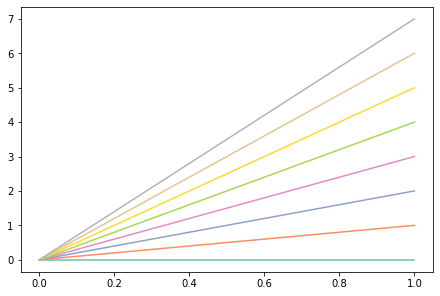

In [64]:
colors = plt.colormaps['Set2'].colors

fig, ax = plt.subplots(layout='constrained')

for i, color in enumerate(colors):
    ax.plot([0, i], color=color)

plt.show()

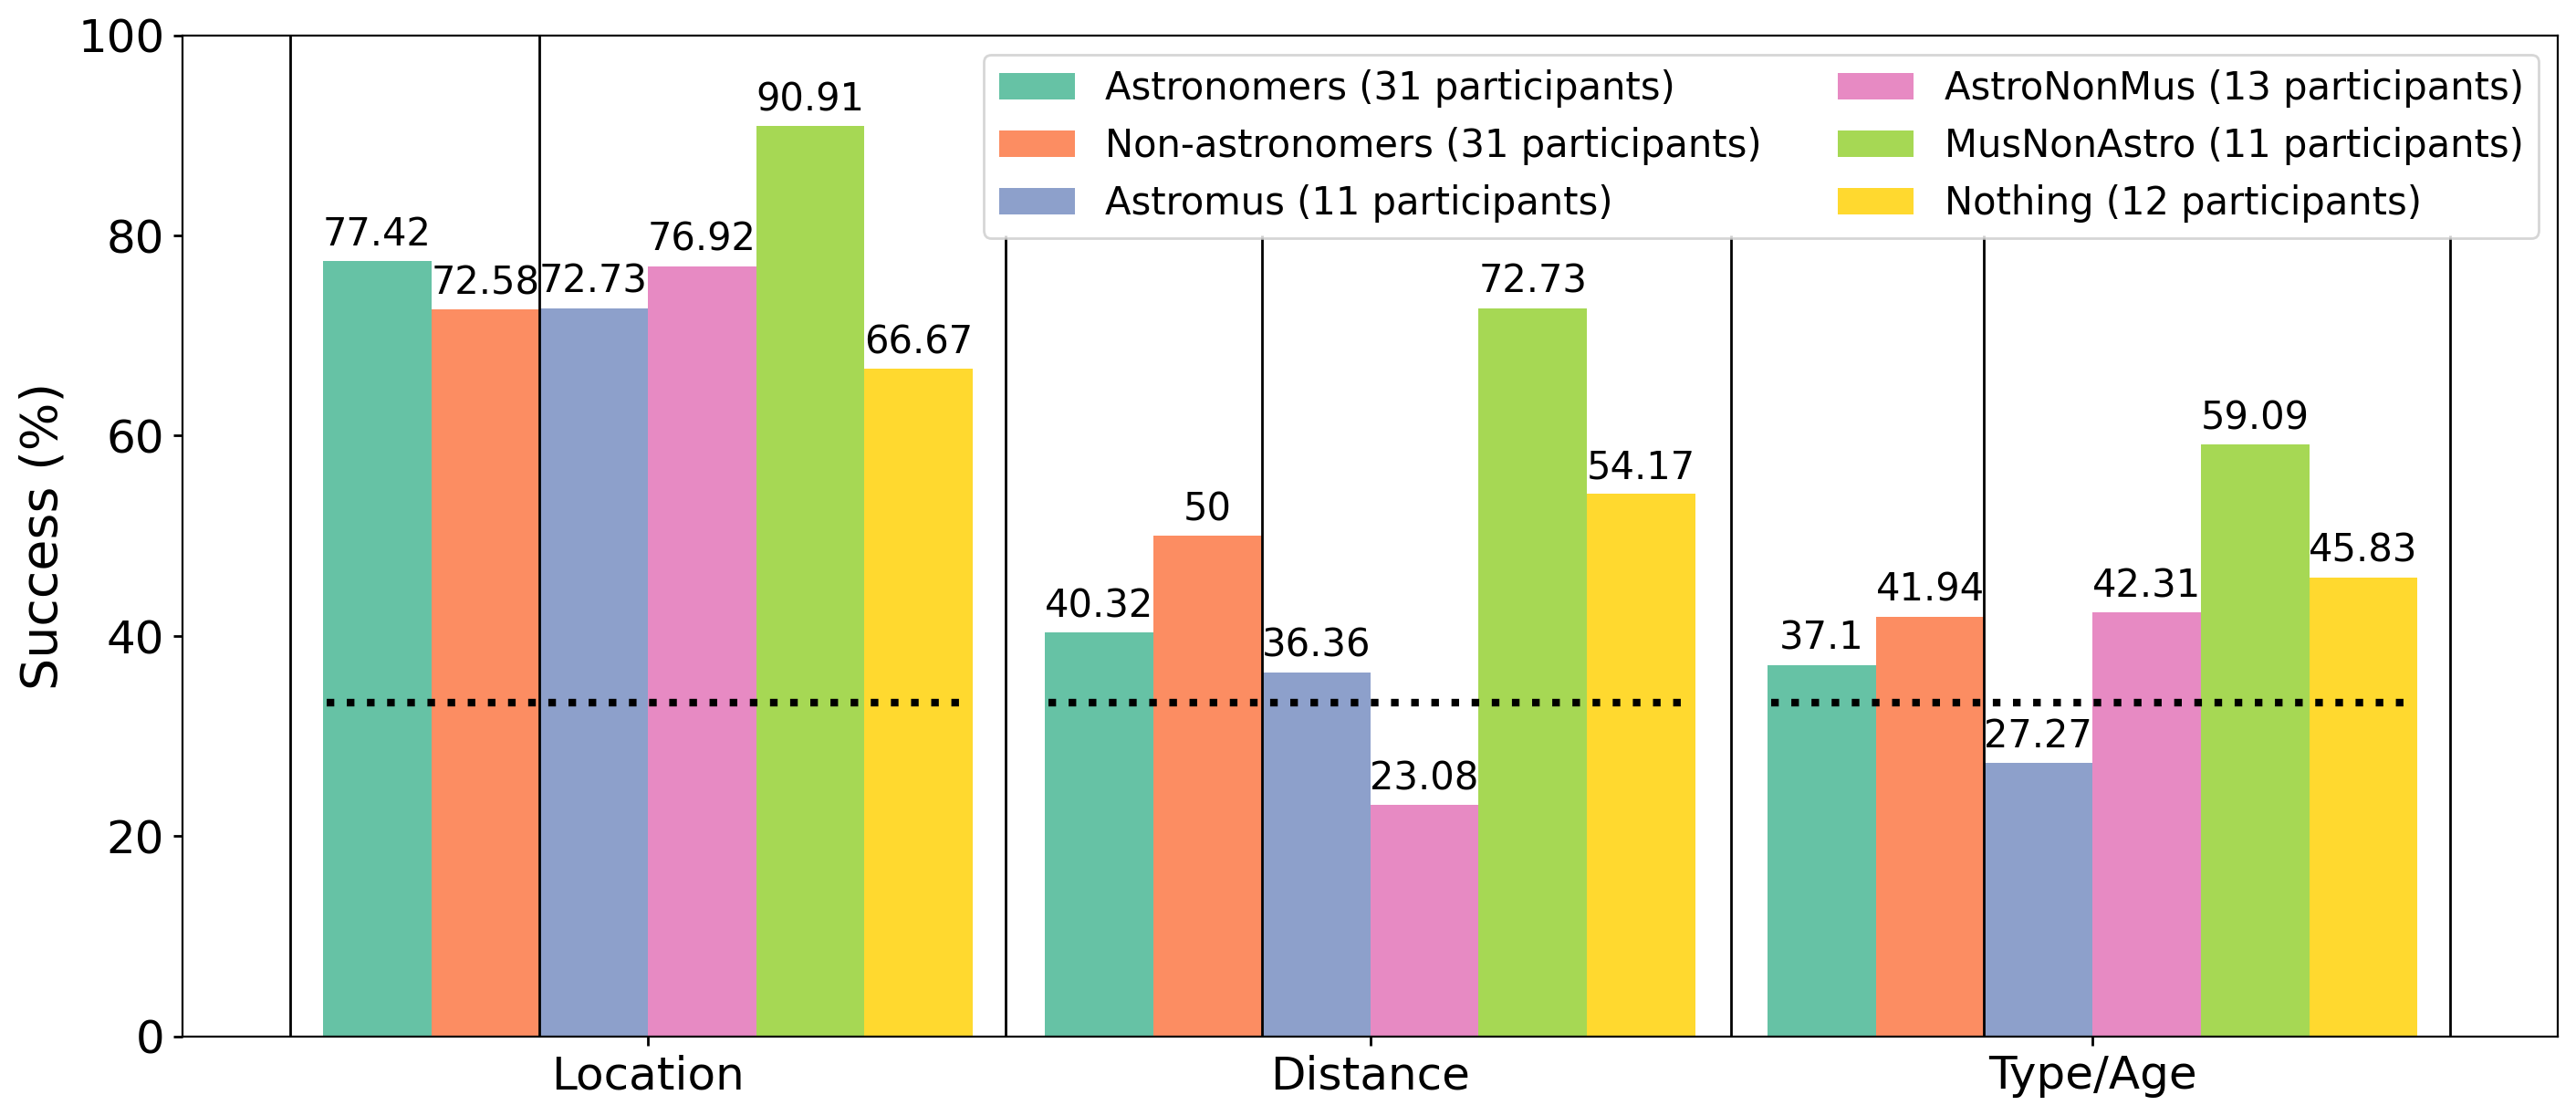

In [67]:
plt.style.use('fast')
questions = ("Location", "Distance", "Type/Age")
success = {
    #'Global': np.concatenate((data_correct, combined_correct)),
    'Astronomers (31 participants)': E_mean_combined,
    'Non-astronomers (31 participants)': nE_mean_combined,
    'Astromus (11 participants)': AM_mean_combined,
    'AstroNonMus (13 participants)': ANM_mean_combined,
    'MusNonAstro (11 participants)': NEM_mean_combined,
    'Nothing (12 participants)': NO_mean_combined,

}

x = np.arange(len(questions))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,6),dpi=200, layout='constrained', )
i=0
for attribute, measurement in success.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[i])
    ax.bar_label(rects, padding=3, size = 15)
    multiplier += 1
    i+=1 

ax.hlines(y=33.3, color='black', linestyle=':', linewidth=3, xmin=-.07, xmax=.82)
ax.hlines(y=33.3, color='black', linestyle=':', linewidth=3, xmin=0.93, xmax=1.82)
ax.hlines(y=33.3, color='black', linestyle=':', linewidth=3, xmin=1.93, xmax=2.82)

ax.vlines(x=-.12, color='black', linestyle='', linewidth=2, ymin=0, ymax=105)
ax.vlines(x=.225, color='black', linestyle='', linewidth=2, ymin=0, ymax=105)
ax.vlines(x=0.87, color='black', linestyle='', linewidth=2, ymin=0, ymax=80)
ax.vlines(x=1.225, color='black', linestyle='', linewidth=2, ymin=0, ymax=80)
ax.vlines(x=1.875, color='black', linestyle='', linewidth=2, ymin=0, ymax=80)
ax.vlines(x=2.225, color='black', linestyle='', linewidth=2, ymin=0, ymax=80)
ax.vlines(x=2.87, color='black', linestyle='', linewidth=2, ymin=0, ymax=80)



ax.set_ylabel('Success (%)', size=20)
ax.set_xticks(.225 + x + width, questions)
ax.tick_params(which='major', width=1.0, labelsize=18)
ax.legend(fontsize= 15, loc='upper right', ncols=2)
ax.set_ylim(0, 100)

plt.savefig('ViewCube_COMB_questions.png')
plt.show()